In [70]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(extrafont)
#font_import()

get_variance_differences <- function(result) {
  diff_1_2 <- result[["variance_rl"]][,1] - result[["variance_rl"]][,2]
  diff_1_3 <- result[["variance_rl"]][,1] - result[["variance_rl"]][,3]
  return(data.frame(diff_1_2 = diff_1_2, diff_1_3 = diff_1_3))
}

get_mse_differences <- function(result) {
  diff_1_2 <- sqrt(result[["MSE_matrix_rl"]][,1]) - sqrt(result[["MSE_matrix_rl"]][,2])
  diff_1_3 <- sqrt(result[["MSE_matrix_rl"]][,1]) - sqrt(result[["MSE_matrix_rl"]][,3])
  return(data.frame(diff_1_2 = diff_1_2, diff_1_3 = diff_1_3))
}

In [223]:
Plot_var <- function(result_1, result_2, result_3, result_4, n_1, n_2, n_3, n_4, title){
    data_variance_1 <- get_variance_differences(result_1)
    data_variance_2 <- get_variance_differences(result_2)
    data_variance_3 <- get_variance_differences(result_3)
    data_variance_4 <- get_variance_differences(result_4)

    data_variance_1$n <- n_1
    data_variance_2$n <- n_2
    data_variance_3$n <- n_3
    data_variance_4$n <- n_4
    combined_data <- bind_rows(data_variance_1, data_variance_2, data_variance_3, data_variance_4)

    combined_data_long <- combined_data %>%
      pivot_longer(cols = c("diff_1_2", "diff_1_3"), names_to = "difference_type", values_to = "variance_difference")


    ggplot(combined_data_long, aes(x = as.factor(n), y = variance_difference, fill = difference_type)) +
      geom_boxplot() +
      labs(title = title, x = "n", y = "Variance Difference") +
      geom_hline(yintercept = 0, color = "red",linewidth=1.5) +
      theme_minimal() +

      theme(
        panel.border = element_rect(color = "black", fill = NA, size = 1),

        legend.position = c(0.5, 0.85),
        legend.background = element_rect(fill = alpha("white", 0), color = NA),

        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),

        axis.title = element_text(family = "Times New Roman", size = 40, face = "bold"),
        axis.title.x = element_text(family = "Times New Roman", size = 45, face = "bold"),
        axis.text = element_text(family = "Times New Roman", size = 40, face = "bold"),
        legend.title = element_text(family = "Times New Roman", size = 30, face = "bold"),
        legend.text = element_text(family = "Times New Roman", size = 32, face = "bold"),
        plot.title = element_text(family = "Times New Roman",hjust = 0.5, size = 45, face = "bold")  
      ) +

      scale_fill_manual(
        values = c("diff_1_2" = "lightblue", "diff_1_3" = "green"),
        name = "",
        labels = c(expression(bold(Var(italic(tilde(V)(s[j]^{"*"}))) - Var(italic(hat(V)[U](s[j]^{"*"}))))), expression(bold(Var(italic(tilde(V)(s[j]^{"*"}))) - Var(italic(hat(V)[V](s[j]^{"*"})))))))+
    coord_cartesian(ylim = c(0, 500))#c(0,800)

}


Plot_mse <- function(result_1, result_2, result_3, result_4, n_1, n_2, n_3, n_4, title){
       
    data_mse_1 <- get_mse_differences(result_1)
    data_mse_2 <- get_mse_differences(result_2)
    data_mse_3 <- get_mse_differences(result_3)
    data_mse_4 <- get_mse_differences(result_4)

    data_mse_1$n <- n_1
    data_mse_2$n <- n_2
    data_mse_3$n <- n_3
    data_mse_4$n <- n_4

    combined_data <- bind_rows(data_mse_1, data_mse_2, data_mse_3, data_mse_4)

    combined_data_long <- combined_data %>%
      pivot_longer(cols = c("diff_1_2", "diff_1_3"), names_to = "difference_type", values_to = "mse_difference")

     ggplot(combined_data_long, aes(x = as.factor(n), y = mse_difference, fill = difference_type)) +
      geom_boxplot() +
      labs(title = title, x = "n", y = "RMSE Difference") +
      geom_hline(yintercept = 0, color = "red",linewidth=1.5) +
      theme_minimal() +

      theme(
        panel.border = element_rect(color = "black", fill = NA, size = 1),

        legend.position = c(0.6, 0.85),
        legend.background = element_rect(fill = alpha("white", 0), color = NA),

        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),

        axis.title = element_text(family = "Times New Roman", size = 40, face = "bold"),
        axis.title.x = element_text(family = "Times New Roman", size = 45, face = "bold"),
        axis.text = element_text(family = "Times New Roman", size = 40, face = "bold"),
        legend.title = element_text(family = "Times New Roman", size = 40, face = "bold"),
        legend.text = element_text(family = "Times New Roman", size = 40, face = "bold"),
        plot.title = element_text(family = "Times New Roman",hjust = 0.5, size = 45, face = "bold")  
      ) +

      scale_fill_manual(
        values = c("diff_1_2" = "gray", "diff_1_3" = "white"),
        name = "",
        labels = c(expression(bold(tilde(italic(R)) - hat(italic(R))[U])),expression(bold(tilde(italic(R)) - hat(italic(R))[V])))
      )+
    coord_cartesian(ylim = c(-10, 20))
    }

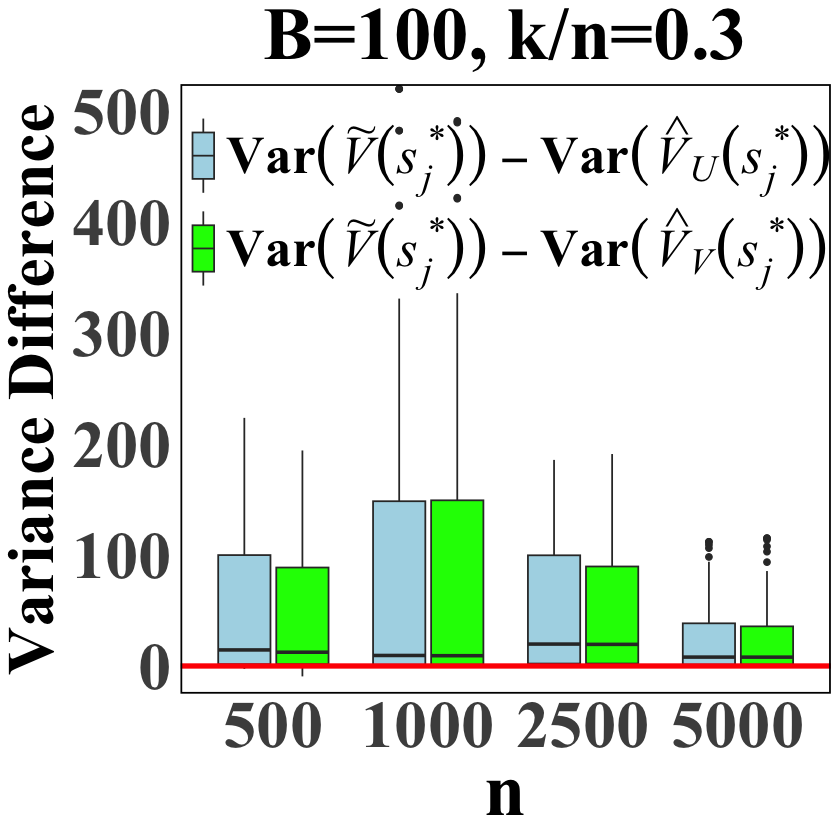

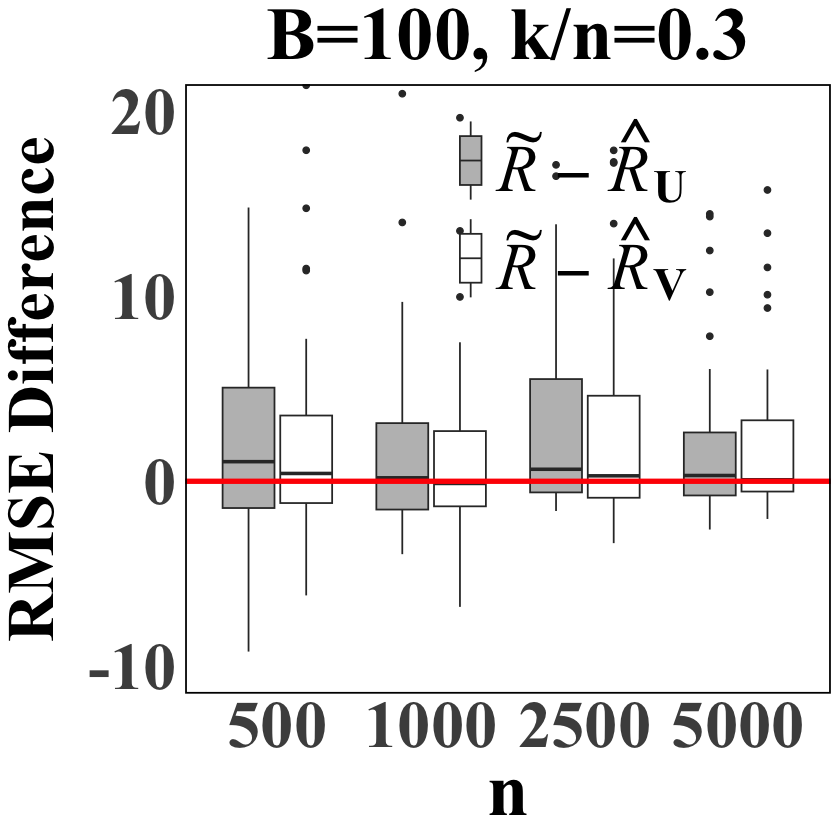

In [224]:
result_2 <- dget(file = "RL_3.3.2.txt")
result_3 <- dget(file = "RL_3.3.3.txt")
result_4 <- dget(file = "RL_3.3.4.txt")
result_6 <- dget(file = "RL_3.3.6.txt")
n_2=500; n_3=2500; n_4=5000; n_6=1000

Plot_var(result_2,result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=100, k/n=0.3")
Plot_mse(result_2,result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=100, k/n=0.3")

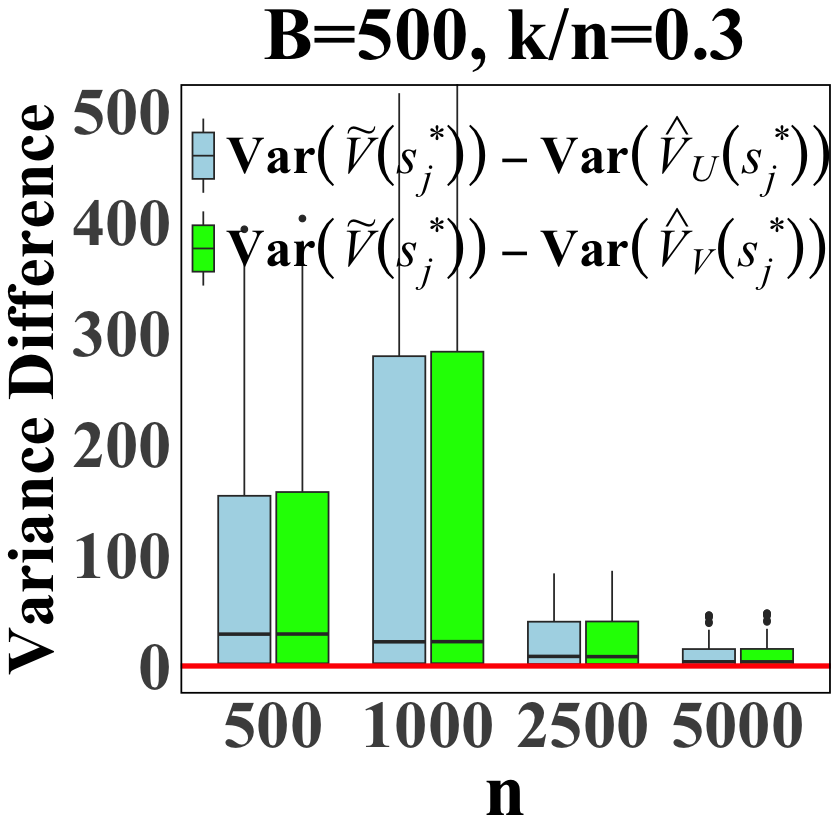

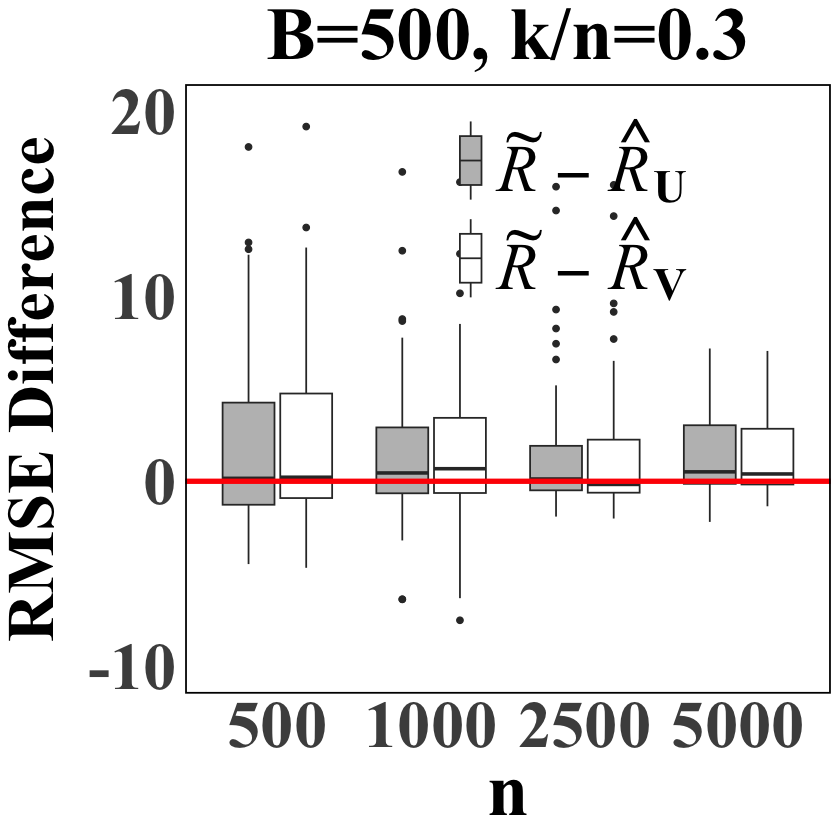

In [225]:
result_2 <- dget(file = "RL_3.2.2.txt")
result_3 <- dget(file = "RL_3.2.3.txt")
result_4 <- dget(file = "RL_3.2.4.txt")
result_6 <- dget(file = "RL_3.2.6.txt")
n_2=500; n_3=2500; n_4=5000; n_6=1000

Plot_var(result_2,result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=500, k/n=0.3")
Plot_mse(result_2,result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=500, k/n=0.3")

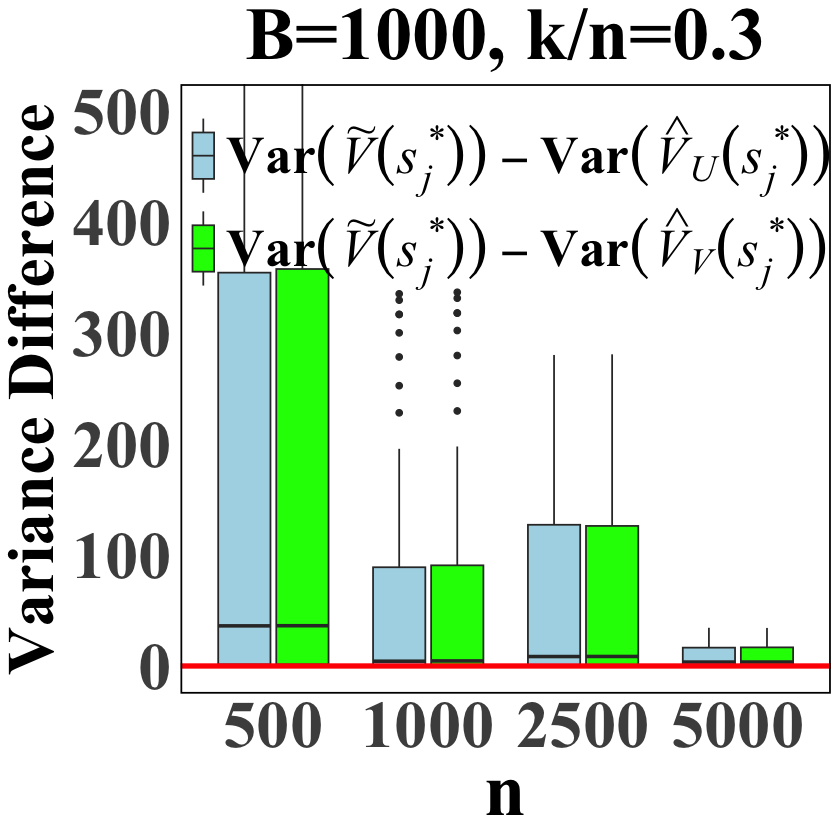

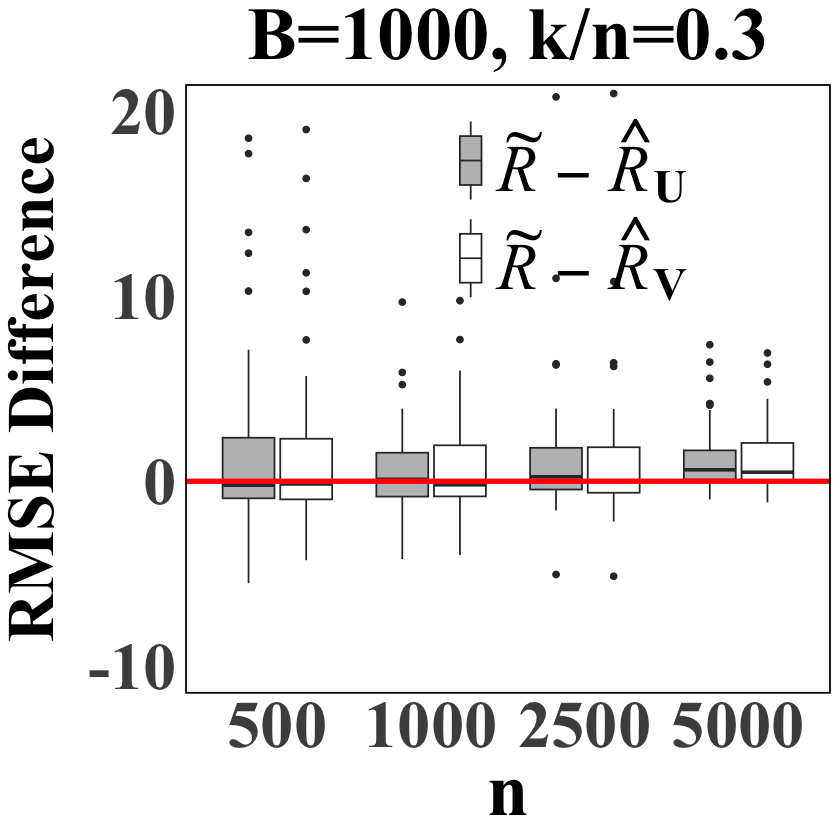

In [226]:
result_2 <- dget(file = "RL_3.4.2.txt")
result_3 <- dget(file = "RL_3.4.3.txt")
result_4 <- dget(file = "RL_3.4.4.txt")
result_6 <- dget(file = "RL_3.4.6.txt")

n_2=500; n_3=2500; n_4=5000; n_6=1000

Plot_var(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=1000, k/n=0.3")
Plot_mse(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=1000, k/n=0.3")

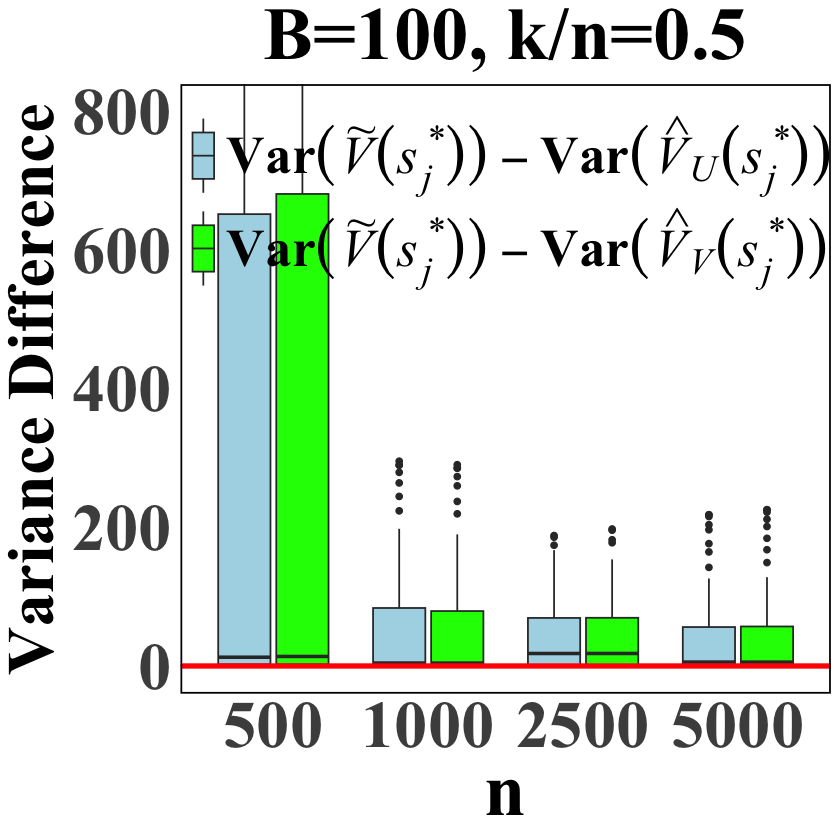

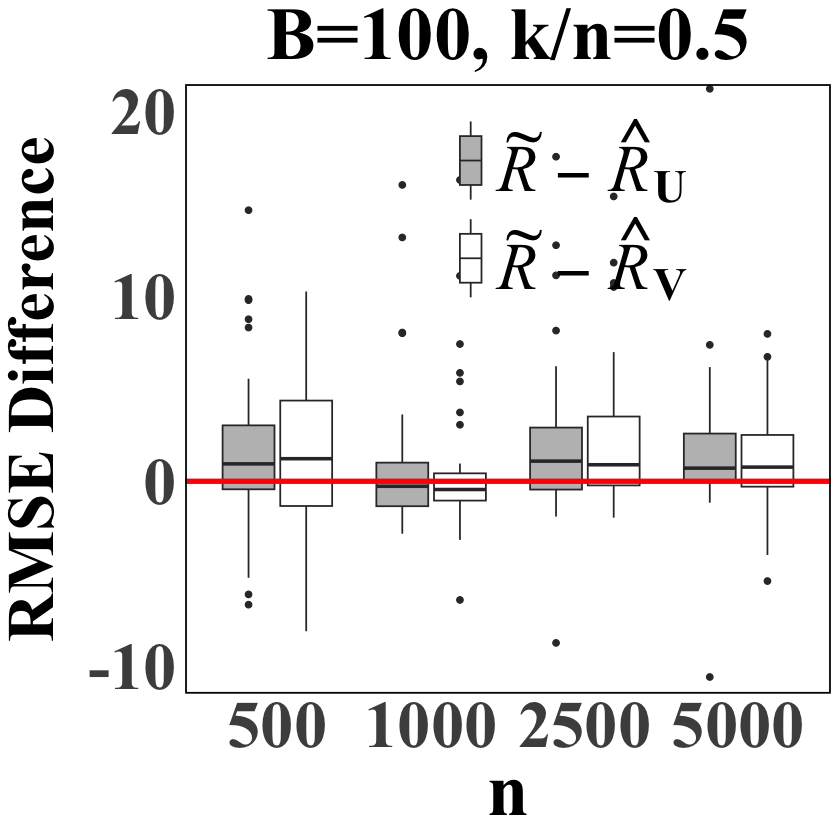

In [209]:
result_2 <- dget(file = "RL_5.3.2.txt")
result_6 <- dget(file = "RL_5.3.6.txt")
result_3 <- dget(file = "RL_5.3.3.txt")
result_4 <- dget(file = "RL_5.3.4.txt")
n_2=500; n_6=1000; n_3=2500; n_4=5000

Plot_var(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=100, k/n=0.5")
Plot_mse(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=100, k/n=0.5")

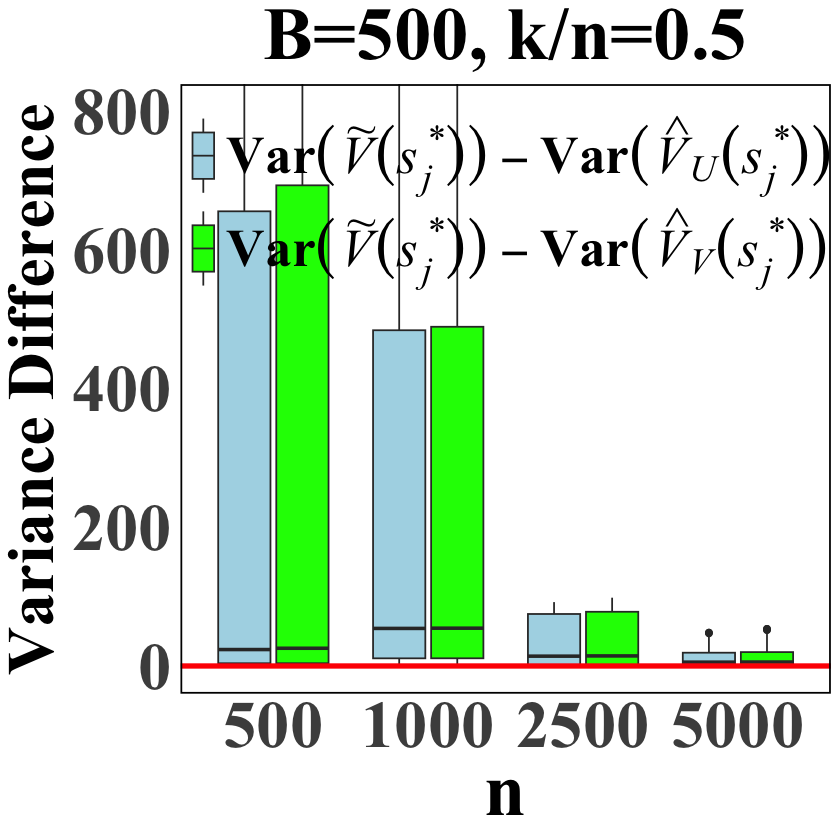

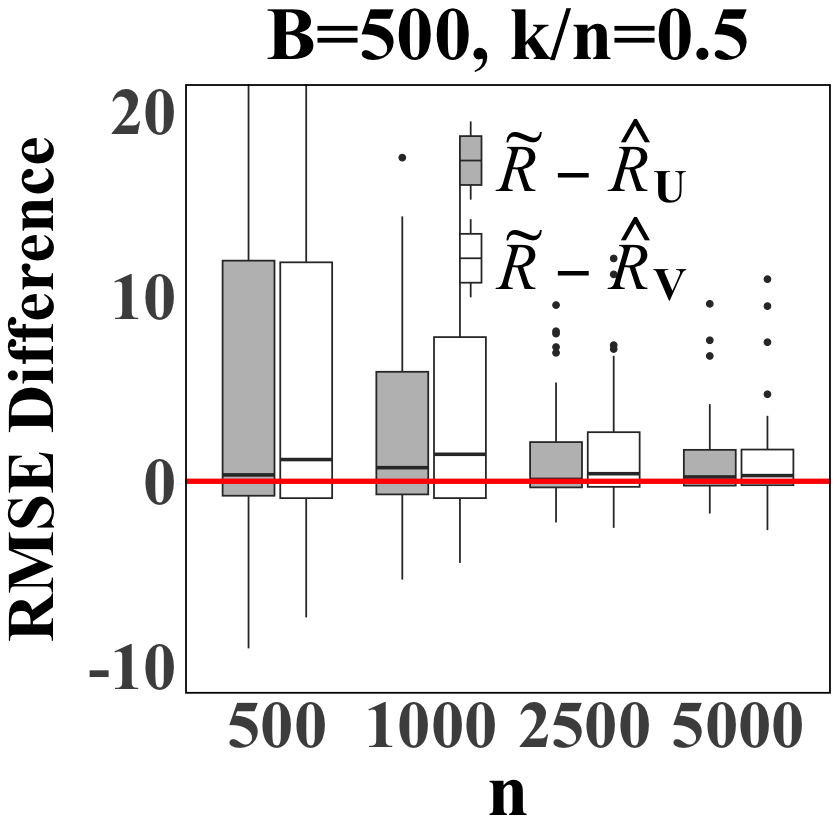

In [210]:
result_2 <- dget(file = "RL_5.2.2.txt")
result_3 <- dget(file = "RL_5.2.3.txt")
result_4 <- dget(file = "RL_5.2.4.txt")
result_6 <- dget(file = "RL_5.2.6.txt")
n_2=500; n_6=1000; n_3=2500; n_4=5000

Plot_var(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=500, k/n=0.5")
Plot_mse(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=500, k/n=0.5")

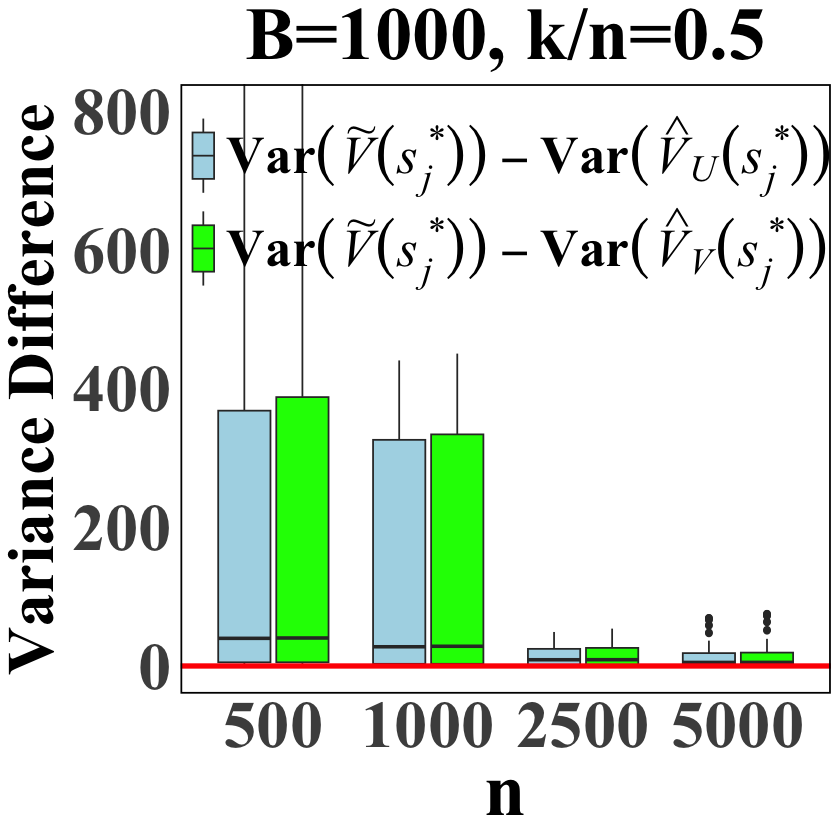

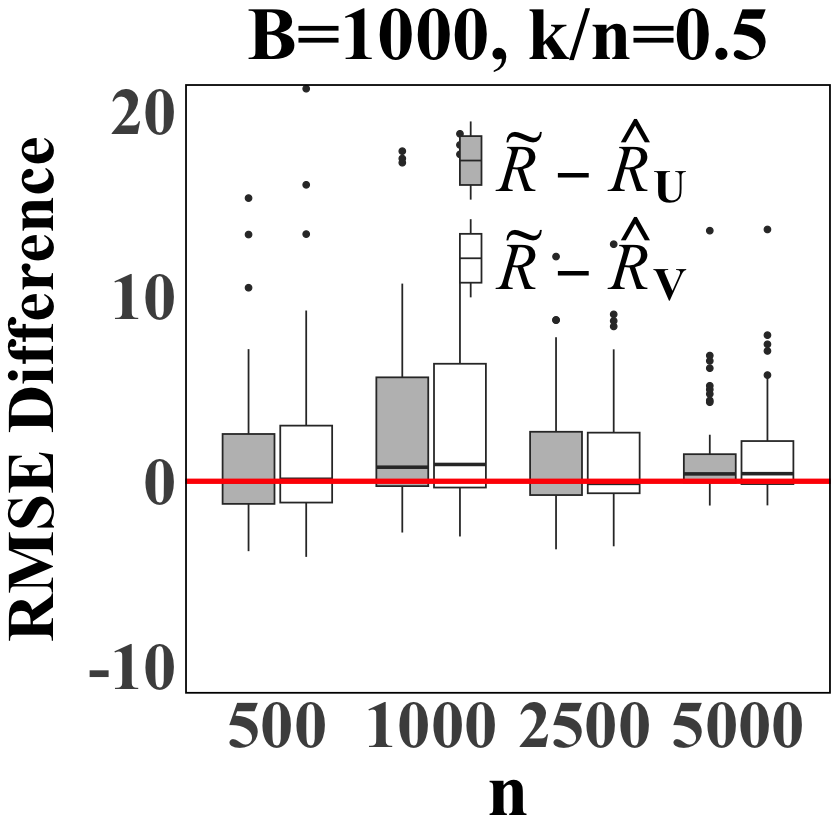

In [211]:
result_2 <- dget(file = "RL_5.4.2.txt")
result_3 <- dget(file = "RL_5.4.3.txt")
result_4 <- dget(file = "RL_5.4.4.txt")
result_6 <- dget(file = "RL_5.4.6.txt")
n_2=500; n_3=2500; n_4=5000; n_6=1000

Plot_var(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=1000, k/n=0.5")
Plot_mse(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=1000, k/n=0.5")

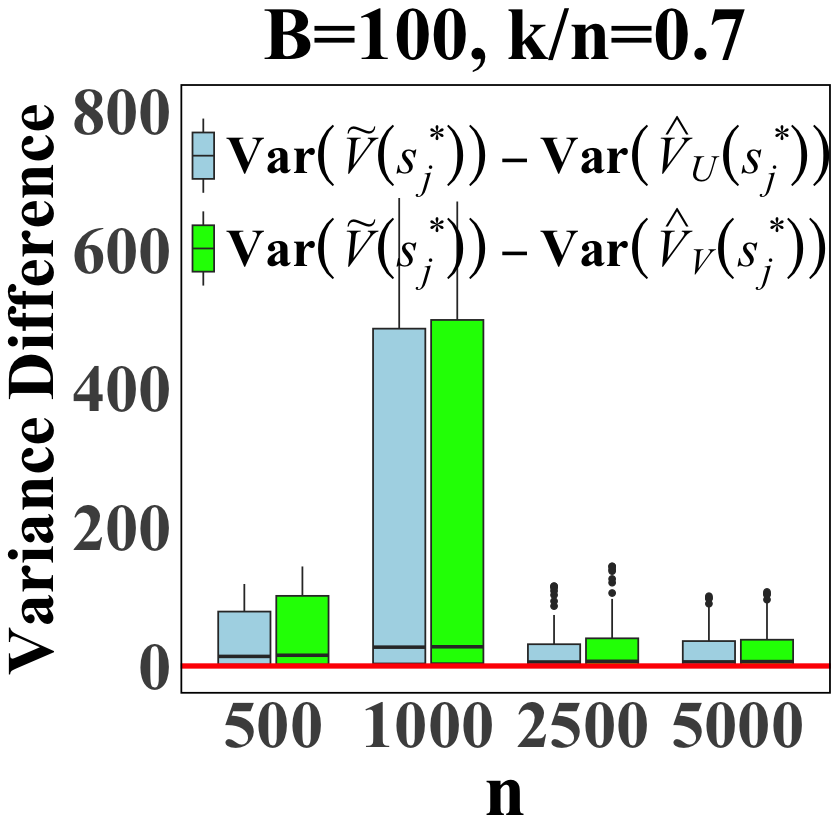

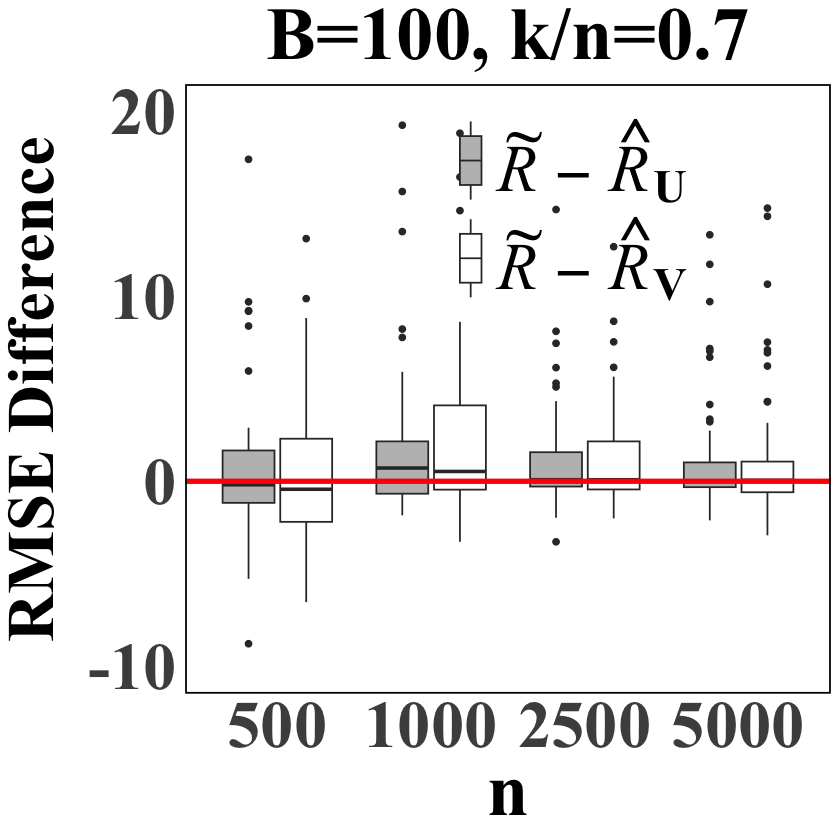

In [212]:
result_2 <- dget(file = "RL_7.3.2.txt")
result_3 <- dget(file = "RL_7.3.3.txt")
result_4 <- dget(file = "RL_7.3.4.txt")
result_6 <- dget(file = "RL_7.3.6.txt")
n_2=500; n_3=2500; n_4=5000; n_6=1000

Plot_var(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=100, k/n=0.7")
Plot_mse(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=100, k/n=0.7")

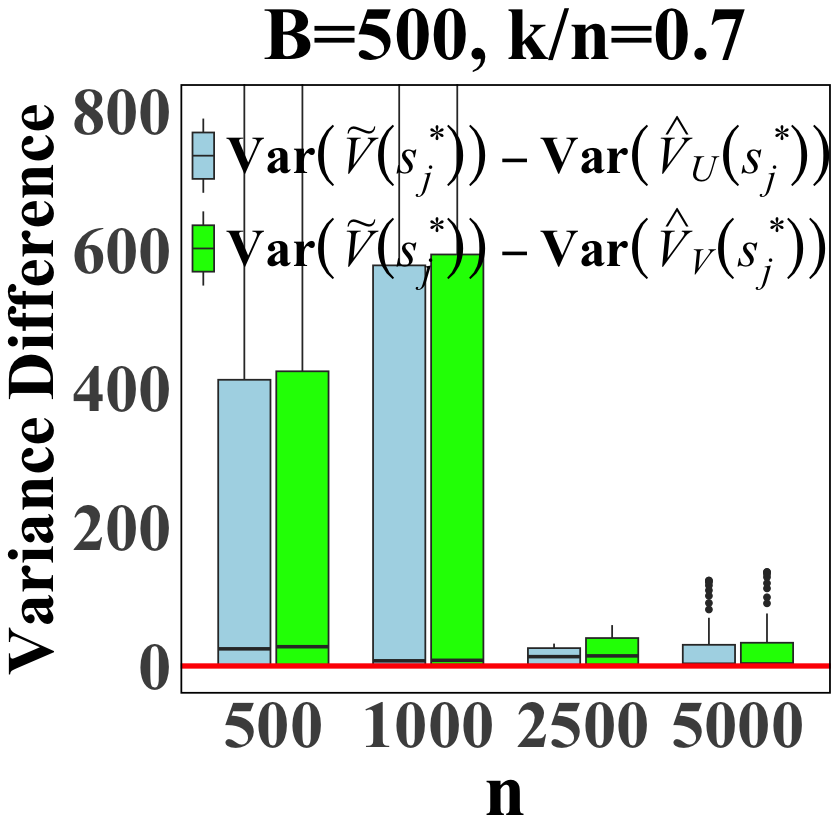

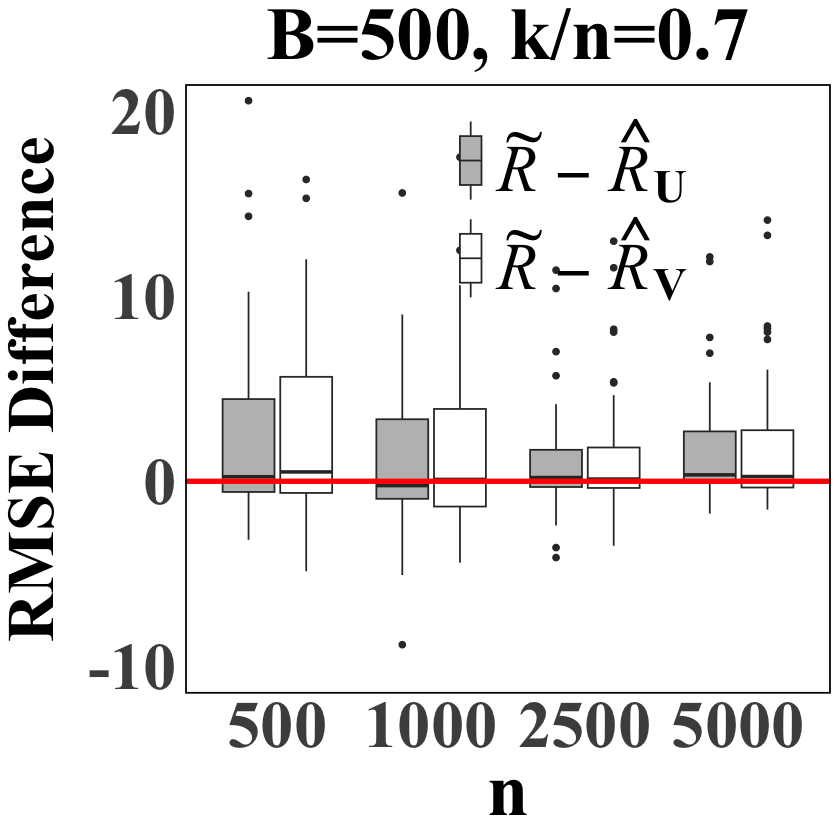

In [213]:
result_2 <- dget(file = "RL_7.2.2.txt")
result_3 <- dget(file = "RL_7.2.3.txt")
result_4 <- dget(file = "RL_7.2.4.txt")
result_6 <- dget(file = "RL_7.2.6.txt")
n_2=500; n_3=2500; n_4=5000; n_6=1000

Plot_var(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=500, k/n=0.7")
Plot_mse(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=500, k/n=0.7")

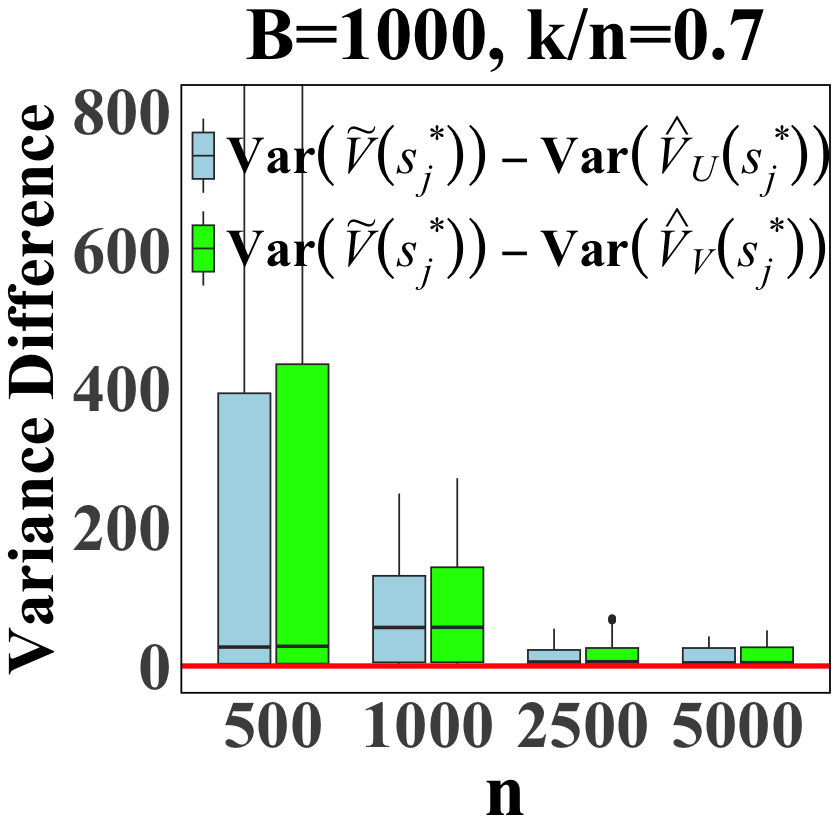

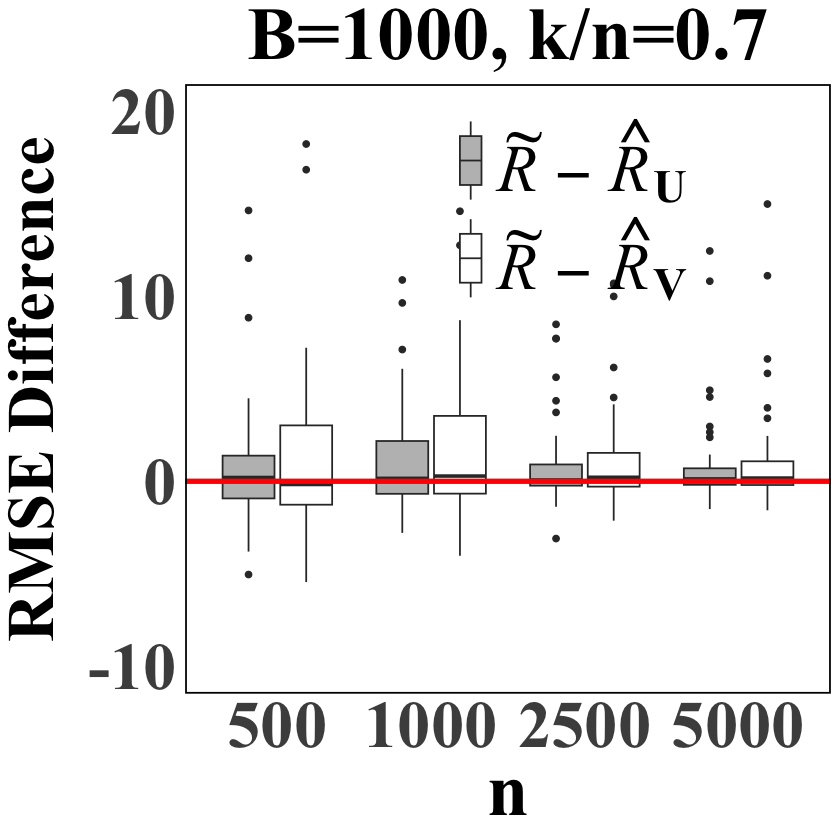

In [214]:
result_2 <- dget(file = "RL_7.4.2.txt")
result_3 <- dget(file = "RL_7.4.3.txt")
result_4 <- dget(file = "RL_7.4.4.txt")
result_6 <- dget(file = "RL_7.4.6.txt")
n_2=500; n_3=2500; n_4=5000; n_6=1000

Plot_var(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=1000, k/n=0.7")
Plot_mse(result_2, result_6, result_3, result_4, n_2, n_6, n_3, n_4, title = "B=1000, k/n=0.7")